# Model Engine: EarthBill Analysis

(NB: Start_here.ipynb has the full starter file, this is customized for the EB modeling)

Table of Contents (TB Updated):
* [Setup](#Setup-EarthBill-Models)
* [Solutions](#Solutions)
* [Scenarios](#Scenarios)
    * [Scenario Parameters](#Looking-at-the-Scenario-Parameters)
    * [Scenario Outputs](#Scenario-Outputs)
        * [Unit Adoption](#Unit-Adoption)
        * [Costs](#Costs)
        * [Emissions](#Emissions)
        * [Key Results](#Key-Results)
* [Examining Solution Data](#Examining-Solution-Data)  _TODO_
* [Changing a Scenario](#Changing-a-Scenario)
* [Ocean Solutions](#Ocean-Solutions)  _TODO_
* [Common Code Patterns](#Common-Code-Patterns)  _TODO_






# Setup EarthBill Models
## EV, Utility Scale PV, Onshore Wind

(Run the cell by putting your cursor in it and clicking on the "&#9654; Run" button above.)

In [1]:
#Setup
from solution import factory
import pandas as pd
from matplotlib import pyplot as plt
import json
from pathlib import Path

#Show All scenarios for Selected Solutions
print("EVs:", factory.list_scenarios("electricvehicles"),"\n")
print("Solar PV Util:", factory.list_scenarios("solarpvutil"),"\n")
print("Wind Onshore:", factory.list_scenarios("onshorewind"),"\n")
print("Trucks:", factory.list_scenarios("trucks"),"\n")

#load Scenario
ev_pds3 = factory.load_scenario("electricvehicles", "PDS3")
solarpv_pds3 = factory.load_scenario("solarpvutil", "PDS3")
windon_pds3 = factory.load_scenario("onshorewind", "PDS3")
trucks_pds3 = factory.load_scenario("trucks", "PDS3")

#Print Selected Scenario Name
print("Selected EV Scenario (See Excel):", ev_pds3.scenario,"\n")
print("Selected Solar PV Util Scenario (See Excel):", solarpv_pds3.scenario,"\n")
print("Selected Wind Onshore Scenario (See Excel):", windon_pds3.scenario,"\n")
print("Selected Trucks Scenario (See Excel):", trucks_pds3.scenario,"\n")


EVs: ['PDS1-21p2050-ComDat-FullyIntegrated', 'PDS2-33p2050-ComDat-FullyIntegrated', 'PDS3-92p2050-ComData-FullyIntegrated'] 

Solar PV Util: ['PDS-20p2050-PDS1_June2020', 'PDS-25p2050-PDS2_june2020', 'PDS-25p2050-PDS3_June2020'] 

Wind Onshore: ['PDS-20p2050-Plausible2020', 'PDS-27p2050-Drawdown2020', 'PDS-27p2050-Optimum2020'] 

Trucks: ['PDS1-9p2050-Oct21ComDat', 'PDS2-9p2050-Oct21ComDat', 'PDS3-9p2050-Oct21ComDat'] 

Selected EV Scenario (See Excel): PDS3-92p2050-ComData-FullyIntegrated 

Selected Solar PV Util Scenario (See Excel): PDS-25p2050-PDS3_June2020 

Selected Wind Onshore Scenario (See Excel): PDS-27p2050-Optimum2020 

Selected Trucks Scenario (See Excel): PDS3-9p2050-Oct21ComDat 



# START HERE (Next: update Scenario and save to .json)

### Looking at the Scenario Parameters

There are many parameters that are used to define a Scenario, and some of those parameters are more arcane than others.  The `key_inputs` method returns a set of the most important scalar parameter values.

In [3]:
# Show the units associated with this solution
for unit in ev_pds3.units:
    print(f'{unit:>30}:   {ev_pds3.units[unit]}')

#Show the key input parameters
inputs = ev_pds3.key_inputs()
for inpt in inputs:
    print(f'{inpt:>30}:   {inputs[inpt]}')


           implementation unit:   vehicle
               functional unit:   billion passenger-km
                    first cost:   US$B
                operating cost:   US$B
                 pds_2014_cost:   36317.523345066766
        soln_lifetime_capacity:   0.000346582848014648
           soln_avg_annual_use:   2.4485619375e-05
soln_fixed_oper_cost_per_iunit:   634.2005524308272
  soln_var_oper_cost_per_funit:   13224200.431077885
 soln_energy_efficiency_factor:   0.0
   soln_fuel_efficiency_factor:   0.8964768329017938
      soln_emissions_per_funit:   0.0
   soln_indirect_co2_per_iunit:   12.55864172870986


The parameter names can be a bit cryptic.  We can (sometimes) get a better explanation of what they mean by using the `explain_parameter` method:

In [4]:
print("1:",ev_pds3.ac.explain_parameter('pds_2014_cost'),"\n")
print("2:",ev_pds3.ac.explain_parameter('conv_2014_cost'),"\n")
print("3:",ev_pds3.ac.explain_parameter('soln_lifetime_capacity'),"\n")
print("4:",ev_pds3.ac.explain_parameter('soln_avg_annual_use'),"\n")
print("5:",ev_pds3.ac.explain_parameter('soln_var_oper_cost_per_funit'),"\n")
print("6:",ev_pds3.ac.explain_parameter('soln_fixed_oper_cost_per_iunit'),"\n")
print("7:",ev_pds3.ac.explain_parameter('soln_energy_efficiency_factor'),"\n")
print("8:",ev_pds3.ac.explain_parameter('soln_fuel_efficiency_factor'),"\n")
print("9:",ev_pds3.ac.explain_parameter('soln_emissions_per_funit'),"\n")
print("10:",ev_pds3.ac.explain_parameter('soln_indirect_co2_per_iunit'),"\n")


1: SOLUTION First Cost per Implementation Unit

NOTE: This is the cost of acquisition and the cost of installation (sometimes one and the same) or the cost of initiating a program/practice (for solutions where there is no direct artifact to acquire and install) per Implementation unit of the SOLUTION.

E.g. What is the cost to acquire and install rooftop solar PV? 

2: CONVENTIONAL First Cost per Implementation Unit for replaced practices/technologies

NOTE: This is the cost of acquisition and the cost of installation (sometimes one and the same) or the cost of initiating a program/practice (for solutions where there is no direct artifact to acquire and install) per Unit of Implementation of the CONVENTIONAL mix of practices (those practices that do not include the technology in question.

E.g. What is the cost to purchase an internal combustion engine (ICE) vehicle? 

3: Lifetime Capacity - SOLUTION

NOTE: This is the average expected number of functional units generated by the SOLUTI

The other major input is Adoption, which is the amount of some good or service that is *provided or supported by* the solution technology.

Let's look at the adoption of this scenario:

In [5]:
ev_pds3_adoption = ev_pds3.ht.soln_pds_funits_adopted()
ev_pds3_adoption

,World,OECD90,Eastern Europe,Asia (Sans Japan),Middle East and Africa,Latin America,China,India,EU,USA
Year,,,,,,,,,,
2014,116.388993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,121.576689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,126.764385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,131.952081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,137.139777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,296.833998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,450.813652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,643.958095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,878.813588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Show only 'World' data.
ev_pds3_adoption['World']

Year
2014      116.388993
2015      121.576689
2016      126.764385
2017      131.952081
2018      137.139777
2019      296.833998
2020      450.813652
2021      643.958095
2022      878.813588
2023     1157.926392
2024     1483.842768
2025     1859.108976
2026     2286.271277
2027     2767.875931
2028     3306.469200
2029     3904.597345
2030     4564.806625
2031     5289.643302
2032     6081.653636
2033     6943.383888
2034     7877.380319
2035     8886.189190
2036     9972.356761
2037    11138.429293
2038    12386.953046
2039    13720.474283
2040    15141.539262
2041    16652.694245
2042    18256.485493
2043    19955.459267
2044    21752.161826
2045    23649.139432
2046    25648.938346
2047    27754.104829
2048    29967.185140
2049    32290.725541
2050    34727.272293
2051    37279.371655
2052    39492.924005
2053    40439.210844
2054    41439.613938
2055    42495.814625
2056    43609.425829
2057    44782.053051
2058    46015.345349
2059    47310.967645
2060    48670.553544
Name: Wo

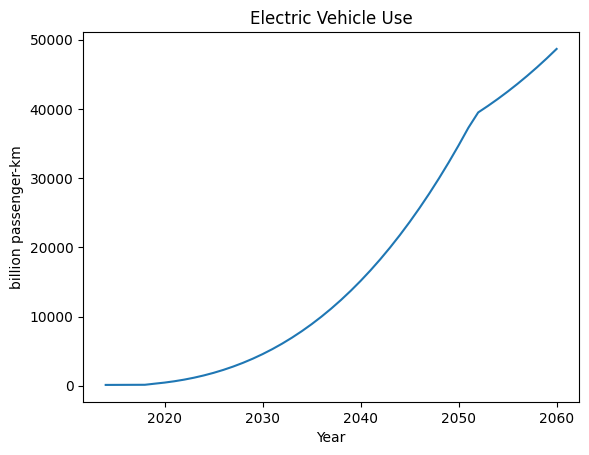

In [7]:
# Graph the world adoption data, with the units as an axis label.
# Here we are using the default Pandas plotting function

ev_pds3_adoption['World'].plot(ylabel=ev_pds3.units['functional unit'], title='Electric Vehicle Use');

The adoption data for this scenario is estimated from 2014 to 2060.  You often want to look at the data from the current year onwards.  (Side note: there is some inconsistency between scenarios in how they handle "prior" data, so it is generally advised to ignore data before the current year.)

The pandas syntax to select a subset of years (rows) is a little obscure: use `somedf.loc[minyear:maxyear]`.  Note the use of square brackets instead of the parenthesis you might expect.

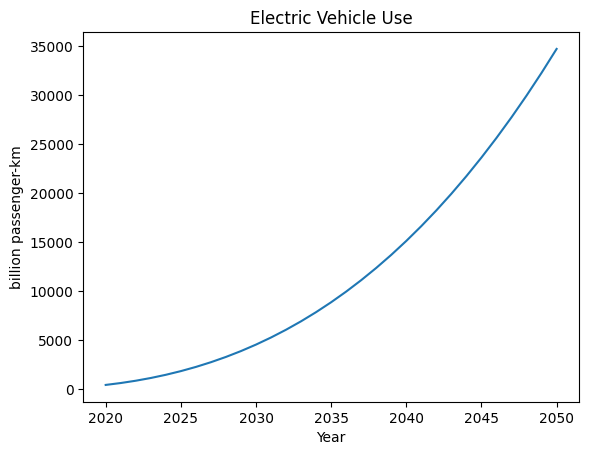

In [8]:
# this is legal:  ev_pds3_adoption.loc[2020:2050]['World']
# so is this:     ev_pds3_adoption['World'].loc[2020:2050]
# or you can combine them:

ev_pds3_ad = ev_pds3_adoption.loc[2020:2050,'World']

ev_pds3_ad.plot(ylabel=ev_pds3.units['functional unit'], title='Electric Vehicle Use');

### Scenario Outputs

The key outputs of a PDME model are the (1) the implementation unit (iunit) adoption, (2) costs of achieving it (how much money is required to install and use the solution at the level required by the adoption), and the (3) CO2-e emissions that result.  It is possible to get results as plots over time (as we have seen with adoption above), or as summaries over the entire scenario period up to 2050.  We'll walk through some of these for our Electric Cars scenario.


#### Unit Adoption
First let's look at iunit adoption.  Recall that adoption is an _input_, but that adoption input is specified in _functional_ units,
which for the electric vehicle solution is measured in billion passenger-km.  How many _implementation_ units (electric cars)
are required to provide those billions of km?  We will find answers to questions about implementation units
in the Unit Adoption (`ua`) component of the scenario:

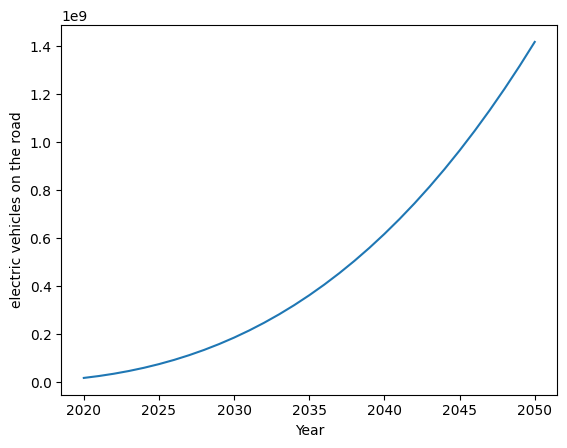

In [9]:
ev_pds3_cars_on_roads = ev_pds3.ua.soln_pds_tot_iunits_reqd().loc[2020:2050,'World']
ev_pds3_cars_on_roads.plot(ylabel="electric vehicles on the road");

Those are the total number of electric vehicles on the road for each year, but how many _new_ vehicles are required each year, including replacement of older vehicles?

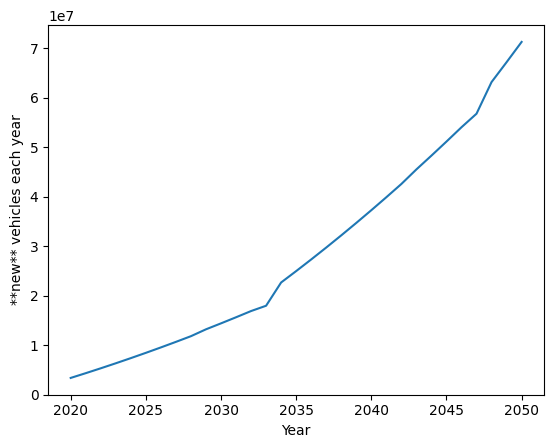

In [13]:
ev_pds3_new_cars_each_year = ev_pds3.ua.soln_pds_new_iunits_reqd().loc[2020:2050,'World']
ev_pds3_new_cars_each_year.plot(ylabel="**new** vehicles each year");

As you can see, the number of new EVs is an order of magnitude less than the total EVs (note the scale is 1e7 vs 1e8).  Also, the "bumps" you see in this graph are the result of how the PDME models the vehicle lifetimes, as a single constant number rather than a probability distribution (this is a possible area of enhancement in the future).

#### Costs
Now let's look at costs. PDME models costs as 'first', 'fixed' and 'variable'.  First cost is the cost to acquire/build/deploy an implementation unit (e.g. the cost to buy an EV).  Fixed costs are per-unit costs that remain the same per year, regardless of usage (like insurance), while variable costs depend on the usage of the object (e.g. the cost of electricity to recharge the EV).  First Cost information is found in the `fc` module, while fixed and variable costs are covered in the Operating Cost `oc` module.  In this example we're going to add those together to show the total cost over time.

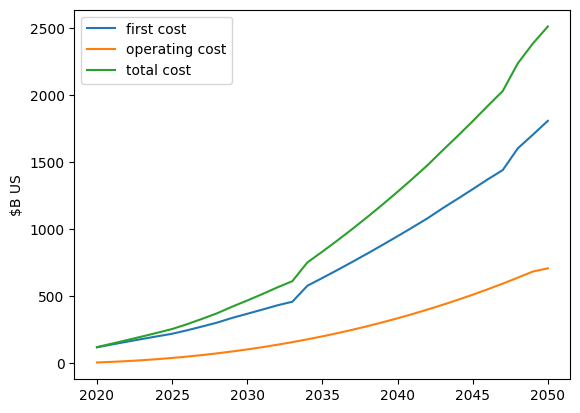

In [14]:
ev_pds3_first_cost = ev_pds3.fc.soln_pds_annual_world_first_cost().loc[2020:2050]
ev_pds3_operating_cost = ev_pds3.oc.soln_pds_annual_operating_cost().loc[2020:2050]
ev_pds3_total_cost = ev_pds3_first_cost + ev_pds3_operating_cost   # adding two arrays is easy

# Here we are doing a more complex plot so we can put multiple lines on the same plot.
# We also divide the values to produce an easier to read y-range in billions of dollars

x_axis = range(2020,2051)
plt.plot(x_axis, ev_pds3_first_cost / 1000000000, label='first cost')
plt.plot(x_axis, ev_pds3_operating_cost / 1000000000, label='operating cost')
plt.plot(x_axis, ev_pds3_total_cost / 1000000000, label='total cost')
plt.ylabel("$B US")
plt.legend();

We can see that according to this model, the first cost is much greater than the ongoing operational cost, and the total cost would be around 2.5 Trillion dollars in 2050.

Note: not all Solutions include cost modeling.  You'll just get a bunch of zeros or NaNs if you look at cost data for a Solution that does not support it.  Also note that most of the cost functions only provide results for global data, not regional.

#### Emissions

PDME models emissions in four different categories:
1. _direct_ emissions, due either to chemical processes or the use of fuel by the solution,
1. _electric_ emissions, due to the use of electric power (the amount of which in turn depends on the mix of electric power generation technologies in place),
1. _indirect_ emissions, emissions required to produce goods or products required to provide the solution,
1. _sequestration_, which is effectively "negative emissions", that occur as a result of the solution (only considered for Land and Ocean solutions).

In addition, direct emissions can be in CO2 or NO2 or methane (CH4), or dealt with in combined CO2e (CO2-equivalent).

Unlike the other outputs we have seen so far, emissions effects are generally specified _relative to conventional practice_.  There are a number of functions in the Unit Adoption (`ua`) module that will give details about each of these categories separately: you can find them in the documentation with names like `ua.soln_pds_direct_co2_emissions_saved()`.  Here we will show you the function you will most often want to see first: the aggregate of all the categories, in the function `c2.co2eq_mmt_reduced()`, which is the total net change in greenhouse gas emissions across all categories.

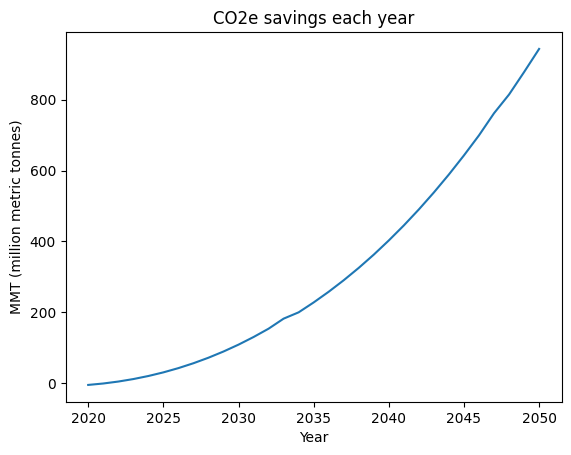

In [15]:
ev_pds3_emissions_reduced = ev_pds3.c2.co2eq_mmt_reduced().loc[2020:2050,'World']
ev_pds3_emissions_reduced.plot(title="CO2e savings each year", ylabel="MMT (million metric tonnes)");

Here we can see, for example, that by 2045, Electric Vehicles are emitting 600 MMT less CO2e per year than standard vehicles would.

The PDME also has an implementation of the FAIR model, which is used to translate changes in _emissions_ to changes in the actual _level of greenhouse gasses_ in the atmosphere over time.  There are some additional notebooks introducing these more advanced concepts in the Documentation folder.

#### Key Results

Finally, there is a simple way to get a summary of the aggregate impact of a scenario across all these outputs in one simple call:

In [40]:
print(ev_pds3.get_key_results(), '\n')
print(ev_pds3.units)

{'implementation_unit_adoption_increase': 664804755.8915443, 'functional_unit_adoption_increase': 16278.156211450143, 'marginal_first_cost': -6.015345449894531, 'net_operating_savings': 9343.38581733759, 'lifetime_operating_savings': 15537.877155690088, 'cumulative_emissions_reduced': 9.761350157338795} 

{'implementation unit': 'vehicle', 'functional unit': 'billion passenger-km', 'first cost': 'US$B', 'operating cost': 'US$B'}


Each of these values is a sum over the lifetime of the scenario (e.g. through 2050), _compared to a baseline scenario_.  We haven't really talked about the baseline before, but usually you can think of it as 'keep doing what we are already doing'.  You will see these two refered to in the code as 'PDS' (the scenario) and 'REF' (the baseline). 

What we are already doing costs money, has emissions, etc., so these numbers represent the delta from that.   In this case, you can see that this scenario actually costs less (in both first cost and operating cost) than be reference baseline.  The costs are in billions US$.  (The 'lifetime' operating savings refers to costs of long-lived items like power plants over their lifetimes.  In the context of a solution such as electric vehicles, it doesn't really mean anything.)

# Examining Solution Data

One of the key features of the Project Drawdown approach is that parameters such as cost and adoption are not simply provided as values with no context.  Each parameter has a set of values behind it that have been derived from the literature.  Then for each scenario, the researcher has used this background data to guide the choice of each parameter value in a coherent way.

So one of the things you might want to do is to explore what the background data is, which is the topic of this section.

**TODO** **TODO**

# Changing a Scenario
Sometimes you might like to try a variation on a given Scenario to see what the impact would be.  You can do that by creating a new Scenario with modified values.  For example, let's try increasing the average annual use of an EV.  Average annual use is measured in (functional units) / (implementation unit) / year.  In our ev_pds3 Scenario, that is 2.44e-05 (billion passenger km) / EV, or 24400 km / EV annually.  Let's suppose we think people will share cars more, and so this value should be more like 30000.  Here is how we would do that:

In [17]:
# Create a new Advanced Controls object (parameter set) that is just like the current one, but changes that one parameter.
newac = ev_pds3.ac.with_modifications(soln_avg_annual_use=3e-5)

# Use that new set of parameters to create another scenario for the EV Solution
newscenario = factory.load_scenario('electricvehicles', newac)

Let's see how that affects the total number of EVs required, shall we?

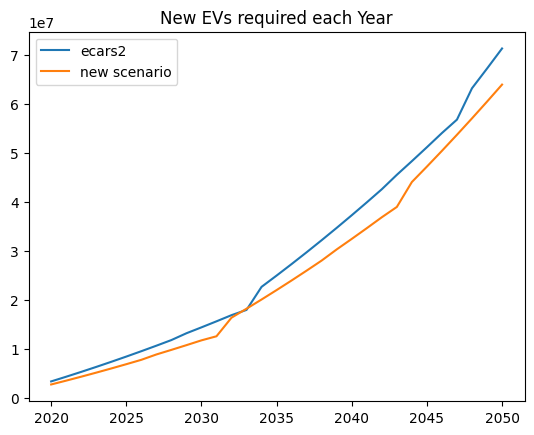

In [18]:
x_axis = range(2020,2051)
plt.plot(x_axis, ev_pds3.ua.soln_pds_new_iunits_reqd().loc[2020:2050,'World'], label='ev_pds3')
plt.plot(x_axis, newscenario.ua.soln_pds_new_iunits_reqd().loc[2020:2050,'World'], label='new scenario')
plt.title("New EVs required each Year")
plt.legend();

You can experiment for yourself comparing other outputs to see what else has changed.  Note also that you can change more than one parameter at a time, you just add them all to the `with_modifications` function:

In [42]:
evs3 = factory.load_scenario("electricvehicles", "PDS3")
earthbillScen = evs3.ac.with_modifications(
    soln_avg_annual_use=3e-5,
    soln_fixed_oper_cost_per_iunit=800
    # as many as you want to add...
)
newerscenario = factory.load_scenario("electricvehicles",newerac)

If you want to save a scenario you have created and use it again, you can save it to a file and later reload it.  

(Note: if you are running this notebook in a hosted environment, can print out the AdvancedControls object, and copy and paste it to a file instead.)

In [20]:
filename = "my_temp_scenario.json"
newerscenario.ac.write_to_json_file(filename)

# then later, load it back
reloaded_params = json.loads(Path(filename).read_text(encoding='utf-8'))  # reload the params from the file
reloaded_scenario = factory.load_scenario("electricvehicles", reloaded_params)  # create a new Scenario object

reloaded_scenario.key_inputs()                   

{'pds_2014_cost': 36317.523345066766,
 'soln_lifetime_capacity': 0.000346582848014648,
 'soln_avg_annual_use': 3e-05,
 'soln_fixed_oper_cost_per_iunit': 800,
 'soln_var_oper_cost_per_funit': 13224200.431077885,
 'soln_energy_efficiency_factor': 0.0,
 'soln_fuel_efficiency_factor': 0.8964768329017938,
 'soln_emissions_per_funit': 0.0,
 'soln_indirect_co2_per_iunit': 12.55864172870986}

### Altering Adoption

The instructions above will allow you to experiment with variations in the scalar paramters for a Solution, but what about adoption?  You can alter that as well, though the technique is a bit hacky.  There is a special parameter that will allow you to specify a 'custom adoption' to load in place of the standard adoption.  The adoption must be identified by a URI, and the adoption will be read from that URI as if it were reading from the official PDME source files.  The format of the data must be the same CSV file format that is used for the official adoption data sources.   Here is what it would look like:

In [21]:
# This cell won't work unless you can make the URI point to the appropriate data.
# TODO: figure out some way to host sample data so that it _will_ work

my_adoption_uri = "file://some_file_somewhere"
params = ev_pds3.ac.with_modifications(
    pds_adoption_custom_source=my_adoption_uri   # this is the key line
)
scenario_with_new_adoption = factory.load_scenario("electricvehicles", params)

AttributeError: 'list' object has no attribute 'get'

### Creating New Solutions
So far we've talked about creating new Scenarios for existing Solutions.  It is also possible to create your own Solution, but the steps involved are not yet documented.  The basic starting point would be to copy an existing solution directory to a new name and start modifying the code.  Aside from changing names of things, the primary requirement is accumulating the backing data and storing it in the proper format as part of your new Solution.

# Ocean Solutions
All the discussion and examples in this notebook have been about RRS (Reduction and Replacement) or Land Solutions.  There are also Ocean Solutions.  Conceptually (and mathematically), they are essentially the same as the others, however the code that implements them is almost entirely different.  This difference is temporary (for some definition of temporary): we plan to merge the two implementations in time.  For now, however, you need to use a different set of functions to do the same things we have demonstrated above.  In this section, we'll demonstrate some of the differences.

# Common Code Patterns